In [1]:
%load_ext autoreload
%autoreload 2

import pathlib
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

REPOSITORY_ROOT = (pathlib.Path().cwd() / "..").resolve()
sys.path.append(str(REPOSITORY_ROOT))

In [2]:
from research.lib import data_access

In [3]:
DATA_VERSION = "2026-01-12"

In [4]:
f = REPOSITORY_ROOT / "data" / "dataframes" / f"consultation-documents-preprocessed-{DATA_VERSION}.parquet"
data_access.ensure_dataframe_is_available(f)
df_docs = pd.read_parquet(f)
df_docs

,document_uuid,consultation_identifier,consultation_start_date,consultation_end_date,consultation_title,consultation_description,document_source_url,consultation_url,consultation_topics,consultation_internal_tags,...,organisation_name,political_body,latest_stored_file_uuid,document_source,consultation_topics_label_source,document_type_label_source,document_content_plain,stored_file_path,stored_file_mime_type,stored_file_hash
0,1CAJoURQMxKeqCdQ4jLniS,7bt3hz2w,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,Bundesamt für Zoll und Grenzsicherheit,ch,1CM3wffQLMxGCHhjJ6PKmR,fedlex,manual,fedlex,«$$e-seal» \n«$$QrCode» \n \n2021-… \n«%ASFF_Y...,2024/1/1/1CM3wffPbDu7fUxY1BS22e.pdf,application/pdf,b8816738ad84d806e55723a313613097bed2752f
1,1CAJoURQMxKeqCdQ4ny8Zz,7bt3hz2w,2021-10-01,2022-01-17,Ordonnance de l'OFDF et de la sécurité des fr...,"Le 19 mars 2021, le Parlement a adopté une mod...",https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,Office fédéral de la douane et de la sécurité ...,ch,1CM3wfgreTc9PyatN1tk6S,fedlex,manual,fedlex,«$$e-seal» \n«$$QrCode» \n \n2021-… \n«%ASFF_Y...,2024/1/2/1CM3wfgr9fonK68eBDTEof.pdf,application/pdf,5420c8491c6d6bc6c5d4fdca4a1140810de324ad
2,1CAJoURQMxKeqCdQ4sRbRT,7bt3hz2w,2021-10-01,2022-01-17,Ordinanza dell’UDSC relativa alla lotta contr...,"Il 19 marzo 2021, il Parlamento ha approvato l...",https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,Ufficio federale della dogana e della sicurezz...,ch,1CM3wfhP96rU1HRuRVmuF3,fedlex,manual,fedlex,«$$e-seal» \n«$$QrCode» \n \n2021-… \n«%ASFF_Y...,2024/1/3/1CM3wfhNu8KNL2ztDAjUXQ.pdf,application/pdf,c62a4dd054d2d89e6a7bf9bd7d64bfd37f4b9403
3,1CAJoURQMxKeqCdQ4vhCQx,7bt3hz2w,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,Bundesamt für Zoll und Grenzsicherheit,ch,1CM3wfhw8g5R8AutE4QTgn,fedlex,manual,fedlex,Eidgenössisches Finanzdepartement EFD \nEidgen...,2024/1/4/1CM3wfhvda7QqrdPBrFGXj.pdf,application/pdf,d47bb05bc7f135a0b850702336ecca328f7dafce
4,1CAJoURQMxKeqCdQ4yYoKW,7bt3hz2w,2021-10-01,2022-01-17,Ordonnance de l'OFDF et de la sécurité des fr...,"Le 19 mars 2021, le Parlement a adopté une mod...",https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,Office fédéral de la douane et de la sécurité ...,ch,1CM3wfiTdLqZuwjEBCPX57,fedlex,manual,fedlex,Eidgenössisches Finanzdepartement EFD \nEidgen...,2024/1/5/1CM3wfiT8gg3bHfDFnuD9j.pdf,application/pdf,d47bb05bc7f135a0b850702336ecca328f7dafce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56421,1CWu1iuswQyZGSWj62SBuc,kru3z5yu,2026-01-07,2026-04-14,Révision de l’ordonnance 2 relative à la loi s...,La nouvelle disposition prévoit des règles par...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/kru3z5yu,[economics],"[{'created_at': 2026-01-08 11:55:38, 'name': '...",...,Secrétariat d'État à l'économie,ch,1CWu1nW93Vqvt9e5TE5oNP,fedlex,manual,fedlex,«$$e-seal» \n«$$QrCode» \n \n2025-... \n«%ASFF...,2026/5347/58484/1CWu1nW8oKHsBX98yo7kE3.pdf,application/pdf,bf8041eb16d55744921981875e8f48e9d8ac9f

In [5]:
f = REPOSITORY_ROOT / "data" / "dataframes" / f"consultation-documents-features-{DATA_VERSION}.parquet"
data_access.ensure_dataframe_is_available(f)
df_features = pd.read_parquet(f)
df_features

,,contains_table_on_first_page,count_pages,count_tables,count_pages_containing_tables,count_images,count_pages_containing_images,average_page_aspect_ratio
document_uuid,stored_file_hash,,,,,,,
1CAJoURQMxKeqCdQ4jLniS,b8816738ad84d806e55723a313613097bed2752f,False,26,0.0,0.0,0.0,0.0,0.704898
1CAJoURQMxKeqCdQ4vhCQx,d47bb05bc7f135a0b850702336ecca328f7dafce,False,6,0.0,0.0,1.0,1.0,0.707098
1CAJoURQMxKeqCdQ564eYH,fdcb391ccf2efd9b56a446e39284e3cceab5e4eb,False,2,0.0,0.0,1.0,1.0,0.707098
1CAJoURQbi5gxw7Wp5N5rT,b631111878a9eea5ae89bdc7ce85d86c609856a3,False,15,0.0,0.0,13.0,6.0,0.707098
1CAJoURQbi5gxw7WpL8ns1,aa8dee571dc5bd912ba0adcc034dbda45f0b62c9,False,2,0.0,0.0,1.0,1.0,0.707098
...,...,...,...,...,...,...,...,...
1CWu1iuswQyZGSWj62SBuc,bf8041eb16d55744921981875e8f48e9d8ac9ff0,False,4,0.0,0.0,0.0,0.0,0.704898
1CWu1iuswQyZGSWj6BYDmv,d6afd959ea9040047f1c01770c94eeb524f12a55,False,4,0.0,0.0,0.0,0.0,0.704898
1CWu1iuswQyZGSWj6H1jQd,92190e479a5394827d56809b0061a03fade63db8,False,8,0.0,0.0,0.0,0.0,0.707098


In [6]:
f = (
    REPOSITORY_ROOT
    / "data"
    / "dataframes"
    / f"consultation-documents-embeddings-beginnings-openai-text-embedding-3-large-{DATA_VERSION}.parquet"
)
data_access.ensure_dataframe_is_available(f)
df_embeddings = pd.read_parquet(f)
df_embeddings

,embedding
document_uuid,
1CAJoURQMxKeqCdQ4jLniS,"[0.01030252780765295, -0.014312159270048141, -..."
1CAJoURQMxKeqCdQ4vhCQx,"[0.011395552195608616, 0.0014780974015593529, ..."
1CAJoURQMxKeqCdQ564eYH,"[-0.005767590366303921, 0.002646328415721655, ..."
1CAJoURQbi5gxw7Wp5N5rT,"[0.019797369837760925, -0.00907826703041792, -..."
1CAJoURQbi5gxw7WpL8ns1,"[-0.001758241094648838, 0.002000046195462346, ..."
...,...
1CWu1iuswQyZGSWj62SBuc,"[-0.019106436520814896, -0.004856086801737547,..."
1CWu1iuswQyZGSWj6BYDmv,"[-0.014333383180201054, -0.014363912865519524,..."
1CWu1iuswQyZGSWj6H1jQd,"[0.015656854957342148, 0.010701540857553482, -..."


In [7]:
df = df_docs.join(df_embeddings, on="document_uuid")
df = df.dropna(subset=["embedding"])

df = df.join(df_features, on=["document_uuid", "stored_file_hash"])
df = df.dropna(subset=["count_pages"])
df

,document_uuid,consultation_identifier,consultation_start_date,consultation_end_date,consultation_title,consultation_description,document_source_url,consultation_url,consultation_topics,consultation_internal_tags,...,stored_file_mime_type,stored_file_hash,embedding,contains_table_on_first_page,count_pages,count_tables,count_pages_containing_tables,count_images,count_pages_containing_images,average_page_aspect_ratio
0,1CAJoURQMxKeqCdQ4jLniS,7bt3hz2w,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,application/pdf,b8816738ad84d806e55723a313613097bed2752f,"[0.01030252780765295, -0.014312159270048141, -...",False,26.0,0.0,0.0,0.0,0.0,0.704898
1,1CAJoURQMxKeqCdQ4ny8Zz,7bt3hz2w,2021-10-01,2022-01-17,Ordonnance de l'OFDF et de la sécurité des fr...,"Le 19 mars 2021, le Parlement a adopté une mod...",https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,application/pdf,5420c8491c6d6bc6c5d4fdca4a1140810de324ad,"[0.020556675270199776, -0.03586287796497345, -...",False,26.0,0.0,0.0,0.0,0.0,0.704898
2,1CAJoURQMxKeqCdQ4sRbRT,7bt3hz2w,2021-10-01,2022-01-17,Ordinanza dell’UDSC relativa alla lotta contr...,"Il 19 marzo 2021, il Parlamento ha approvato l...",https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,application/pdf,c62a4dd054d2d89e6a7bf9bd7d64bfd37f4b9403,"[0.000971376255620271, -0.0415467694401741, -0...",False,25.0,0.0,0.0,0.0,0.0,0.704898
3,1CAJoURQMxKeqCdQ4vhCQx,7bt3hz2w,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,application/pdf,d47bb05bc7f135a0b850702336ecca328f7dafce,"[0.011395552195608616, 0.0014780974015593529, ...",False,6.0,0.0,0.0,1.0,1.0,0.707098
4,1CAJoURQMxKeqCdQ4yYoKW,7bt3hz2w,2021-10-01,2022-01-17,Ordonnance de l'OFDF et de la sécurité des fr...,"Le 19 mars 2021, le Parlement a adopté une mod...",https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]","[{'created_at': 2024-11-04 15:11:24, 'name': '...",...,application/pdf,d47bb05bc7f135a0b850702336ecca328f7dafce,"[0.01523062027990818, -0.0003517258446663618, ...",False,6.0,0.0,0.0,1.0,1.0,0.707098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56421,1CWu1iuswQyZGSWj62SBuc,kru3z5yu,2026-01-07,2026-04-14,Révision de l’ordonnance 2 relative à la loi s...,La nouvelle disposition prévoit des règles par...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/kru3z5yu,[economics],"[{'created_at': 2026-01-08 11:55:38, 'name': '...",...,application/pdf,bf8041eb16d55744921981875e8f48e9d8ac9ff0,"[-0.019106436520814896, -0.004856086801737547,...",False,4.0,0.0,0.0,0.0,0.0,0.704898
56422,1CWu1iuswQyZGSWj6BYDmv,kru3z5yu,2026-01-07,2026-04-14,Modifica dell’ordinanza 2 concernente la legge...,La nuova disposizione prevede regole speciale ...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/kru3z5yu,[economics],"[{'created_at': 2026-01-08 11:55:38, 'name': '...",...,application/pdf,d6afd959ea9040047f1c01770c94eeb524f12a55,"[-0.014333383180201054, -0.014363912865519524,...",False,4.0,0.0,0.0,0.0,0.0,0.704898
56423,1CWu1iuswQyZGSWj6H1jQd,kru3z5yu,2026-01-07,2026-04-14,Änderung der Ve

In [8]:
positive_examples_uuids = [
    # Consultation 1 (de, it)
    # https://www.demokratis.ch/consultation/5t4vsexw
    ("1CTNYU5G9spvGLKfGCZ5N7", "1CTcVo8weiLMyZ4wZJNwyJ"),
    ("1CTNYU5G9spvGLKfG6zCjs", "1CTcVk5ctCoYC8YoWoPPKR"),
    ("1CTNYU5G9spvGLKfGJRimH", "1CTcVmh58U8oLV3hSZowZH"),
    # Consultation 2 (de, fr)
    # https://www.demokratis.ch/consultation/44787qfu
    ("1CJRwxCt2vnTAVcRivQnhD", "1CJRwxCtHdN251ooKgFRoU"),
    ("1CJRwxCt2vnTAVcRirqdBU", "1CJRwxCt2vnTAVcRjDFm8C"),
    ("1CJRwxCt2vnTAVcRj8jCXh", "1CJRwxCtHdN251ooKqM1FH"),
    ("1CJRwxCt2vnTAVcRj3FMid", "1CJRwxCtHdN251ooKkp5eQ"),
]


def sample_negative_example(df: pd.DataFrame) -> tuple[str, str]:
    while True:
        sample = df.sample(2)
        if sample["consultation_identifier"].nunique() == 2:
            return tuple(sample["document_uuid"].tolist())


negative_examples_uuids = [sample_negative_example(df) for _ in range(8)]


def to_set(t: list[tuple[str, str]]) -> set[str]:
    return {item for sublist in t for item in sublist}


assert to_set(positive_examples_uuids).isdisjoint(to_set(negative_examples_uuids))

In [9]:
def create_sample_df(df: pd.DataFrame, example_uuids: list[tuple[str, str]]) -> pd.DataFrame:
    df_sample = df.loc[df["document_uuid"].isin(to_set(example_uuids))].copy()
    df_sample["pair"] = df_sample["document_uuid"].map(
        lambda uuid: next((i for i, pair in enumerate(example_uuids) if uuid in pair))
    )
    df_sample = df_sample.sort_values(by=["pair", "document_uuid"])
    return df_sample


df_positive = create_sample_df(df, positive_examples_uuids)
df_positive

,document_uuid,consultation_identifier,consultation_start_date,consultation_end_date,consultation_title,consultation_description,document_source_url,consultation_url,consultation_topics,consultation_internal_tags,...,stored_file_hash,embedding,contains_table_on_first_page,count_pages,count_tables,count_pages_containing_tables,count_images,count_pages_containing_images,average_page_aspect_ratio,pair
54904,1CTNYU5G9spvGLKfGCZ5N7,5t4vsexw,2025-09-18,2025-12-18,Gesetz gegen häusliche Gewalt (GHG),Die Regierung gibt den Entwurf für ein neues G...,https://www.gr.ch/DE/publikationen/vernehmlass...,https://www.demokratis.ch/vernehmlassung/5t4vsexw,"[security, social]","[{'created_at': 2025-09-29 10:01:08, 'name': '...",...,16b86dbe3efffb6649966a7a366a241938894d95,"[-0.019929608330130577, -0.001292847446165979,...",False,3.0,0.0,0.0,0.0,0.0,0.704776,0
54903,1CTNYU5G9spvGLKfG6zCjs,5t4vsexw,2025-09-18,2025-12-18,Gesetz gegen häusliche Gewalt (GHG),Die Regierung gibt den Entwurf für ein neues G...,https://www.gr.ch/DE/publikationen/vernehmlass...,https://www.demokratis.ch/vernehmlassung/5t4vsexw,"[security, social]","[{'created_at': 2025-09-29 10:01:08, 'name': '...",...,f0ccae6e9e85cf7ef090dbfa83e3cfff9b1a08eb,"[-0.005259320139884949, -0.017463205382227898,...",False,2.0,0.0,0.0,2.0,2.0,0.707098,1
51898,1CJRwxCt2vnTAVcRivQnhD,44787qfu,2024-12-20,2025-03-19,Der Staatsrat will die Zahl der Ausbildungsabs...,Der Staatsrat schickt einen Vorentwurf für ein...,https://www.fr.ch/de/document/544296,https://www.demokratis.ch/vernehmlassung/44787qfu,"[economics, education, health]","[{'created_at': 2025-01-06 13:43:13, 'name': '...",...,1d9f5bb15641c399dd739814707f6595aa4312ba,"[-0.044960327446460724, 0.017065946012735367, ...",False,6.0,2.0,1.0,0.0,0.0,0.704776,3
51902,1CJRwxCtHdN251ooKgFRoU,44787qfu,2024-12-20,2025-03-19,Le Conseil d’Etat veut augmenter le nombre de ...,Le Conseil d’Etat met en consultation un avant...,https://www.fr.ch/document/544296,https://www.demokratis.ch/vernehmlassung/44787qfu,"[economics, education, health]","[{'created_at': 2025-01-06 13:43:13, 'name': '...",...,3c6e6c160caf29e5b7ee68b2f486204d76308c25,"[-0.041540127247571945, 0.010610333643853664, ...",False,6.0,2.0,1.0,0.0,0.0,0.704776,3
51897,1CJRwxCt2vnTAVcRirqdBU,44787qfu,2024-12-20,2025-03-19,Der Staatsrat will die Zahl der Ausbildungsabs...,Der Staatsrat schickt einen Vorentwurf für ein...,https://www.fr.ch/de/document/544291,https://www.demokratis.ch/vernehmlassung/44787qfu,"[economics, education, health]","[{'created_at': 2025-01-06 13:43:13, 'name': '...",...,a2b8bfd29767c16e316edb2986935cda37ddf91c,"[-0.010891212150454521, 0.015130258165299892, ...",False,1.0,0.0,0.0,4.0,1.0,0.707098,4
51901,1CJRwxCt2vnTAVcRjDFm8C,44787qfu,2024-12-20,2025-03-19,Le Conseil d’Etat veut augmenter le nombre de ...,Le Conseil d’Etat met en consultation un avant...,https://www.fr.ch/document/544291,https://www.demokratis.ch/vernehmlassung/44787qfu,"[economics, education, health]","[{'created_at': 2025-01-06 13:43:13, 'name': '...",...,300f067dd8193d62df9ffed81df75cf788fdc6d6,"[-0.013832666911184788, 0.01477221492677927, -...",False,1.0,0.0,0.0,4.0,1.0,0.707098,4
51900,1CJRwxCt2vnTAVcRj8jCXh,44787qfu,2024-12-20,2025-03-19,Der Staatsrat will die Zahl der Ausbildungsabs...,Der Staatsrat schickt einen Vorentwurf für ein...,https://www.fr.ch/de/document/544311,https://www.demokratis.ch/vernehmlassung/44787qfu,"[economics, education, health]","[{'created_at': 2025-01-06 13:43:13, 'name': '...",...,d7f58a2ee02a594b0b4436bada43b71f76908e1a,"[-0.014695248566567898, 0.018847903236746788, ...",True,3.0,2.0,2.0,3.0,3.0,0.707098,5
51904,1CJRwxCtHdN251ooKqM1FH,44787qfu,2024-12-20,2025-03-19,Le Conseil d’Etat veut augmenter le nombre de ...,Le Conseil d’Etat met en consultation un avant...,https://www.fr.ch/document/544311,https://www.demokratis.ch/vernehmlassung/44787qfu,"[economics, education, health]","[{'created_at': 2025-01-06 13:43:13, 'name': '...",...,d7f58a2ee02a594b0b4436bada43b71f7690

In [10]:
df_negative = create_sample_df(df, negative_examples_uuids)
df_negative

,document_uuid,consultation_identifier,consultation_start_date,consultation_end_date,consultation_title,consultation_description,document_source_url,consultation_url,consultation_topics,consultation_internal_tags,...,stored_file_hash,embedding,contains_table_on_first_page,count_pages,count_tables,count_pages_containing_tables,count_images,count_pages_containing_images,average_page_aspect_ratio,pair
38968,1CAJp2m4C8zr3skhZNdssj,uwqqs675,2015-09-24,2015-11-21,Gesetz über die Verwaltungsrechtspflege (Verwa...,Im Rahmen der Einführung des Elektronischen Ba...,https://www.ag.ch/media/kanton-aargau/portal/a...,https://www.demokratis.ch/vernehmlassung/uwqqs675,"[administration, communications, it]","[{'created_at': 2025-12-12 09:19:55, 'name': '...",...,32940757940c6ce14f92aed927a8c7b1d2aed2ef,"[0.003769924631342292, -0.036941494792699814, ...",False,8.0,0.0,0.0,1.0,1.0,0.707098,0
51595,1CHwYqA6daMi14etkc5VMe,27ezj996,2024-03-26,2024-06-28,Teilrevision des Gesetzes über das kantonale O...,Ziel der vorliegenden Gesetzgebungsvorlage ist...,https://www.nw.ch/_doc/400996,https://www.demokratis.ch/vernehmlassung/27ezj996,"[law, public_finance, security]","[{'created_at': 2025-02-04 12:57:31, 'name': '...",...,d383fda32e72c04feab0d5944603b80774b85c15,"[0.01566384732723236, -0.015159562230110168, -...",False,1.0,0.0,0.0,2.0,1.0,0.706956,0
22828,1CAJooLActdUVtJ3grm6qn,xtyyaa4r,2013-12-06,2014-03-21,Übernahme und Umsetzung der Verordnung (EU) Nr...,Bei der EUROSUR-Verordnung (EUROSUR = European...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/xtyyaa4r,"[migration, security, transportation]",[],...,4cf191f0f7ac46c6d5473ce1d3fd876d4159e78a,"[-0.016801677644252777, 0.01526392251253128, -...",False,2.0,0.0,0.0,10.0,2.0,0.707838,1
46412,1CAJpAxMJs91vsvyWRpy8F,wnpuqbxd,2014-04-04,2014-07-15,Gesetz über den Lehrmittelverlag,Der Kanton Zürich führt gemäss § 10 Abs. 1 des...,https://www.notes.zh.ch/sk/VNL/vnl.nsf/vw-alld...,https://www.demokratis.ch/vernehmlassung/wnpuqbxd,"[economics, education]","[{'created_at': 2025-12-26 18:04:01, 'name': '...",...,94e7bbafbd983f243cdd8d69f754da2ff3a6e6c3,"[0.045025184750556946, -0.02196383848786354, -...",False,29.0,0.0,0.0,0.0,0.0,0.705882,1
9573,1CAJoc6nQGhgLMrtxovMTU,sygt3cbk,2006-12-21,2007-03-26,Ratification de la Convention pour la sauvegar...,"Ratification par la Suisse de la ""Convention p...",https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/sygt3cbk,"[culture, foreign_policy]","[{'created_at': 2025-01-21 13:05:11, 'name': '...",...,1854e04423576a286f03daa34a74719d10631c5d,"[-0.002222558483481407, -0.04002007469534874, ...",False,24.0,0.0,0.0,0.0,0.0,0.772727,2
24453,1CAJopYNN7ckLEsUQHhuAV,pzqut92n,2015-02-02,2015-03-30,Verordnungsanpassungen im Rahmen der neuen Fin...,Gestützt auf die von den eidgenössischen Räten...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/pzqut92n,[transportation],[],...,0bebb644906f14ec231fc09450db28bbafa00673,"[0.00020656877313740551, 0.0031618650536984205...",False,3.0,0.0,0.0,22.0,3.0,0.707838,2
489,1CAJoUassCrohNKXvro7Bu,8gwutthg,2021-12-17,2022-04-01,Teilrevision der Sprachenverordnung,Die Verordnung über die Landessprachen und die...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/8gwutthg,"[culture, public_finance]","[{'created_at': 2025-01-07 12:47:01, 'name': '...",...,b588c045360e291e838d42eedc414e36677ec4c3,"[0.016586264595389366, -0.0066957855597138405,...",False,116.0,NaN,NaN,NaN,NaN,NaN,3
2759,1CAJoVw2cJ1qLN9EZMryou,e8mxh5wt,2022-04-13,2022-08-25,Revisione parziale dell’ordinanza sulla fornit...,La centrale nucleare di Mühleberg (CNM) è stat...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/e8mxh5wt,"[energy, health, security]","[{'created_at': 2024-10-29 15:21:38, 'name': '...",...,d18eb16d993f2cc5e4f9a794bbe5ea9936c5cd44,"[0.007512238342314959, -0.0

In [11]:
def get_similarity_matrix(df: pd.DataFrame, expected_page_stddev: int = 2) -> pd.DataFrame:
    # Convert the list of embeddings to a 2D numpy array
    embeddings_matrix = np.array(df["embedding"].tolist())
    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(embeddings_matrix)

    # Scale by page count similarity
    page_distances = pairwise_distances(df["count_pages"].to_numpy().reshape(-1, 1), metric="euclidean")
    page_similarity = np.exp(-page_distances / expected_page_stddev)

    similarity_matrix *= page_similarity

    # Create a DataFrame for better visualization
    index = df.apply(lambda row: f"Pair {row['pair']}: {row['document_uuid']} ({row['document_language']})", axis=1)
    similarity_df = pd.DataFrame(similarity_matrix, index=index, columns=index)
    return similarity_df


df_positive_similarity = get_similarity_matrix(df_positive)
df_positive_similarity

,Pair 0: 1CTNYU5G9spvGLKfGCZ5N7 (de),Pair 1: 1CTNYU5G9spvGLKfG6zCjs (de),Pair 3: 1CJRwxCt2vnTAVcRivQnhD (de),Pair 3: 1CJRwxCtHdN251ooKgFRoU (fr),Pair 4: 1CJRwxCt2vnTAVcRirqdBU (de),Pair 4: 1CJRwxCt2vnTAVcRjDFm8C (fr),Pair 5: 1CJRwxCt2vnTAVcRj8jCXh (de),Pair 5: 1CJRwxCtHdN251ooKqM1FH (de),Pair 6: 1CJRwxCt2vnTAVcRj3FMid (de),Pair 6: 1CJRwxCtHdN251ooKkp5eQ (fr)
Pair 0: 1CTNYU5G9spvGLKfGCZ5N7 (de),1.000000,0.455139,0.127382,0.106114,0.183200,0.157239,0.431070,0.430094,0.000134,0.000103
Pair 1: 1CTNYU5G9spvGLKfG6zCjs (de),0.455139,1.000000,0.069155,0.060460,0.432689,0.388364,0.368788,0.368294,0.000089,0.000072
Pair 3: 1CJRwxCt2vnTAVcRivQnhD (de),0.127382,0.069155,1.000000,0.812368,0.059145,0.049619,0.121801,0.121801,0.000921,0.000732
Pair 3: 1CJRwxCtHdN251ooKgFRoU (fr),0.106114,0.060460,0.812368,1.000000,0.055149,0.057600,0.135704,0.135633,0.000820,0.000935
Pair 4: 1CJRwxCt2vnTAVcRirqdBU (de),0.183200,0.432689,0.059145,0.055149,1.000000,0.886367,0.286286,0.286194,0.000065,0.000059
Pair 4: 1CJRwxCt2vnTAVcRjDFm8C (fr),0.157239,0.388364,0.049619,0.057600,0.886367,1.000000,0.289546,0.289266,0.000055,0.000066
Pair 5: 1CJRwxCt2vnTAVcRj8jCXh (de),0.431070,0.368788,0.121801,0.135704,0.286286,0.289546,1.000000,0.999898,0.000151,0.000172
Pair 5: 1CJRwxCtHdN251ooKqM1FH (de),0.430094,0.368294,0.121801,0.135633,0.286194,0.289266,0.999898,1.000000,0.000151,0.000172
Pair 6: 1CJRwxCt2vnTAVcRj3FMid (de),0.000134,0.000089,0.000921,0.000820,0.000065,0.000055,0.000151,0.000151,1.000000,0.783180
Pair 6: 1CJRwxCtHdN251ooKkp5eQ (fr),0.000103,0.000072,0.000732,0.000935,0.000059,0.000066,0.000172,0.000172,0.783180,1.000000


In [12]:
df_negative_similarity = get_similarity_matrix(df_negative)
df_negative_similarity

,Pair 0: 1CAJp2m4C8zr3skhZNdssj (de),Pair 0: 1CHwYqA6daMi14etkc5VMe (de),Pair 1: 1CAJooLActdUVtJ3grm6qn (de),Pair 1: 1CAJpAxMJs91vsvyWRpy8F (de),Pair 2: 1CAJoc6nQGhgLMrtxovMTU (fr),Pair 2: 1CAJopYNN7ckLEsUQHhuAV (de),Pair 3: 1CAJoUassCrohNKXvro7Bu (de),Pair 3: 1CAJoVw2cJ1qLN9EZMryou (it),Pair 4: 1CAJobM1PXXnTNuGUKciv8 (fr),Pair 4: 1CAJoe7SPvfAJVbenQ1ZPU (fr),Pair 5: 1CAJp794dnhP3jMfZBGVd1 (de),Pair 5: 1CBFRsQ9VAUFEmTQ1SZFn5 (de),Pair 6: 1CAJonamfbFd3rJZbiLySX (it),Pair 6: 1CAJpBBpvktQgGPW1VUBDk (de),Pair 7: 1CAJoUUXPCy4JEfUJPHD3e (de),Pair 7: 1CAJoa4qGw92WjPazqZpwo (de)
Pair 0: 1CAJp2m4C8zr3skhZNdssj (de),1.000000e+00,1.761736e-02,2.849344e-02,1.776962e-05,1.570524e-04,5.827799e-02,2.469953e-24,5.102217e-01,5.276725e-02,2.829665e-01,2.270676e-01,8.500805e-02,5.682570e-13,8.019272e-02,1.822396e-01,1.456124e-54
Pair 0: 1CHwYqA6daMi14etkc5VMe (de),1.761736e-02,1.000000e+00,3.170524e-01,3.234188e-07,2.669220e-06,2.013250e-01,6.034640e-26,1.328306e-02,8.952644e-02,1.666629e-02,4.799263e-02,1.467740e-01,1.408318e-14,1.248093e-01,3.384100e-02,2.663299e-56
Pair 1: 1CAJooLActdUVtJ3grm6qn (de),2.849344e-02,3.170524e-01,1.000000e+00,5.197465e-07,6.076373e-06,3.977123e-01,1.077879e-25,2.556557e-02,1.742669e-01,3.326869e-02,6.757614e-02,1.798525e-01,2.549494e-14,2.053503e-01,7.268073e-02,5.539861e-56
Pair 1: 1CAJpAxMJs91vsvyWRpy8F (de),1.776962e-05,3.234188e-07,5.197465e-07,1.000000e+00,3.784482e-02,1.168469e-06,7.898615e-20,1.072313e-05,9.651905e-07,6.039543e-06,4.481916e-06,1.556050e-06,1.857736e-08,1.939261e-06,4.093517e-06,4.501005e-50
Pair 2: 1CAJoc6nQGhgLMrtxovMTU (fr),1.570524e-04,2.669220e-06,6.076373e-06,3.784482e-02,1.000000e+00,1.131100e-05,4.865122e-21,1.377595e-04,1.628072e-05,1.043187e-04,3.769965e-05,1.191188e-05,1.716160e-09,1.439977e-05,4.354154e-05,4.153019e-51
Pair 2: 1CAJopYNN7ckLEsUQHhuAV (de),5.827799e-02,2.013250e-01,3.977123e-01,1.168469e-06,1.131100e-05,1.000000e+00,2.091390e-25,4.536055e-02,2.379190e-01,6.300296e-02,1.206301e-01,3.258370e-01,4.234944e-14,3.393217e-01,1.232028e-01,1.107385e-55
Pair 3: 1CAJoUassCrohNKXvro7Bu (de),2.469953e-24,6.034640e-26,1.077879e-25,7.898615e-20,4.865122e-21,2.091390e-25,1.000000e+00,1.997942e-24,1.878788e-25,1.033106e-24,6.863396e-25,2.599546e-25,1.368599e-12,2.801759e-25,6.851013e-25,4.047050e-31
Pair 3: 1CAJoVw2cJ1qLN9EZMryou (it),5.102217e-01,1.328306e-02,2.556557e-02,1.072313e-05,1.377595e-04,4.536055e-02,1.997942e-24,1.000000e+00,5.381758e-02,3.159437e-01,1.578037e-01,5.707612e-02,6.126610e-13,6.363018e-02,2.008282e-01,1.191966e-54
Pair 4: 1CAJobM1PXXnTNuGUKciv8 (fr),5.276725e-02,8.952644e-02,1.742669e-01,9.651905e-07,1.628072e-05,2.379190e-01,1.878788e-25,5.381758e-02,1.000000e+00,9.234395e-02,1.592578e-01,3.988582e-01,5.089783e-14,3.819081e-01,1.394388e-01,1.112178e-55
Pair 4: 1CAJoe7SPvfAJVbenQ1ZPU (fr),2.829665e-01,1.666629e-02,3.326869e-02,6.039543e-06,1.043187e-04,6.300296e-02,1.033106e-24,3.159437e-01,9.234395e-02,1.000000e+00,2.617999e-01,7.662814e-02,3.283142e-13,8.891385e-02,2.613833e-01,8.027624e-55


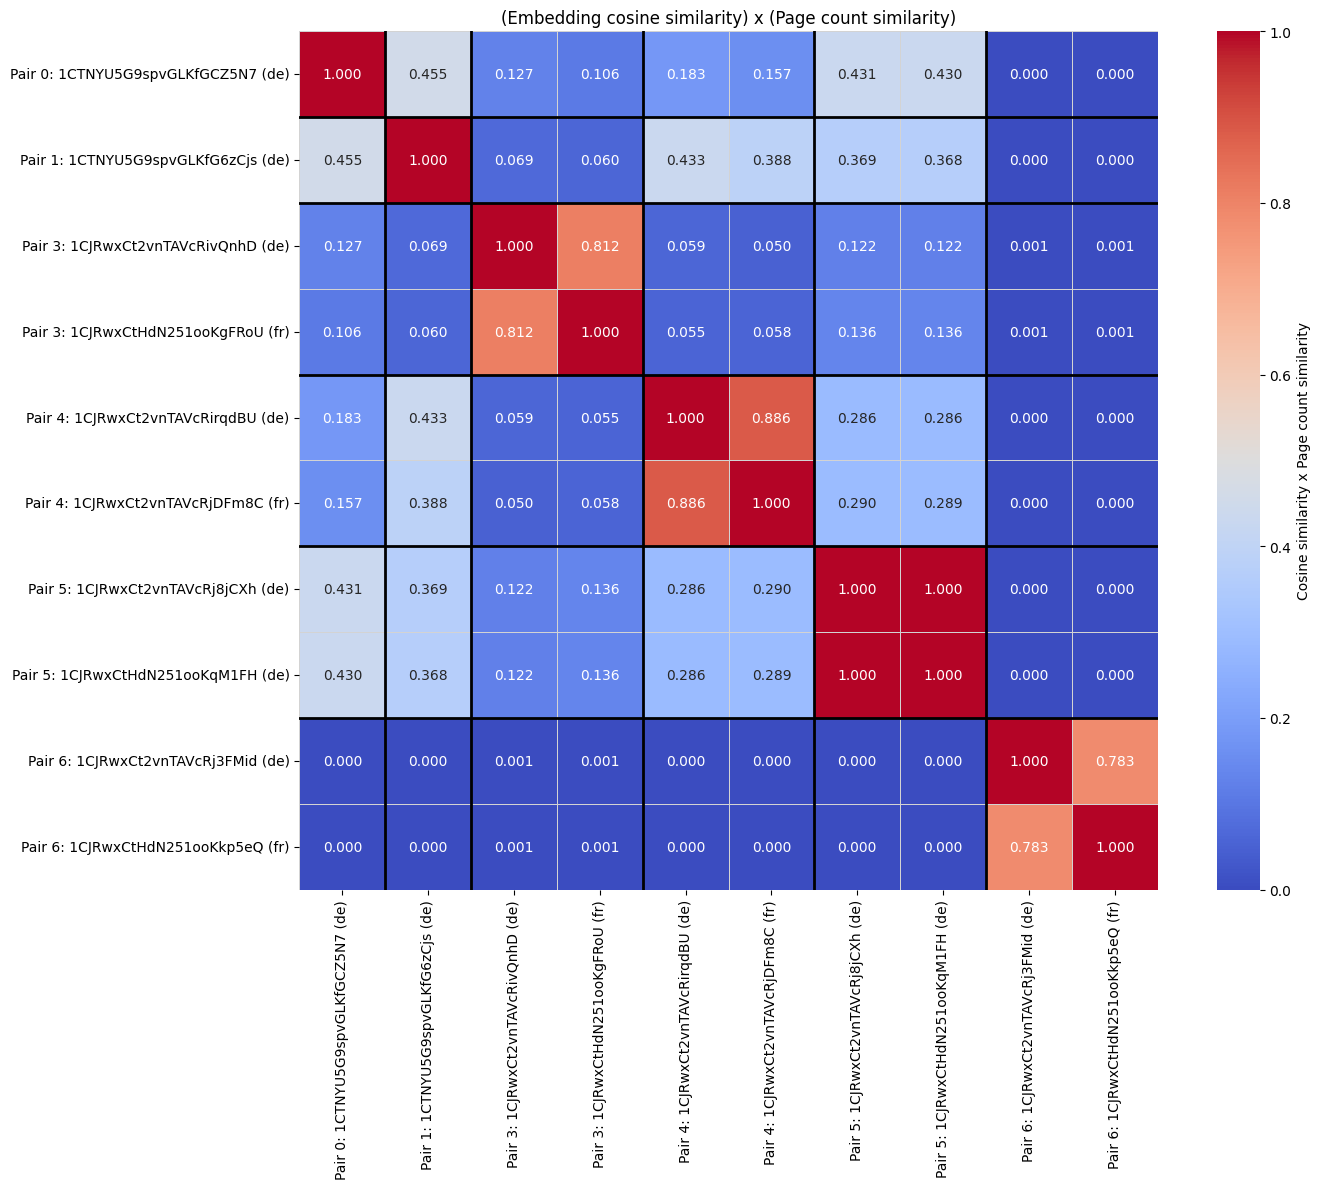

In [13]:
def similarity_heatmap(df: pd.DataFrame, similarity_df: pd.DataFrame) -> None:
    # Get the pair boundaries for drawing lines
    pairs = df["pair"].to_numpy()
    pair_boundaries = [i for i in range(1, len(pairs)) if pairs[i] != pairs[i - 1]]

    plt.figure(figsize=(15, 12))
    ax = sns.heatmap(
        similarity_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        square=True,
        cbar_kws={"label": "Cosine similarity x Page count similarity"},
        vmin=0,
        vmax=1,
        linewidths=0.5,
        linecolor="lightgray",
    )

    # Draw thick lines to separate pairs
    for boundary in pair_boundaries:
        ax.axhline(y=boundary, color="black", linewidth=2)
        ax.axvline(x=boundary, color="black", linewidth=2)

    plt.title("(Embedding cosine similarity) x (Page count similarity)")
    plt.tight_layout()
    plt.show()


similarity_heatmap(df_positive, df_positive_similarity)

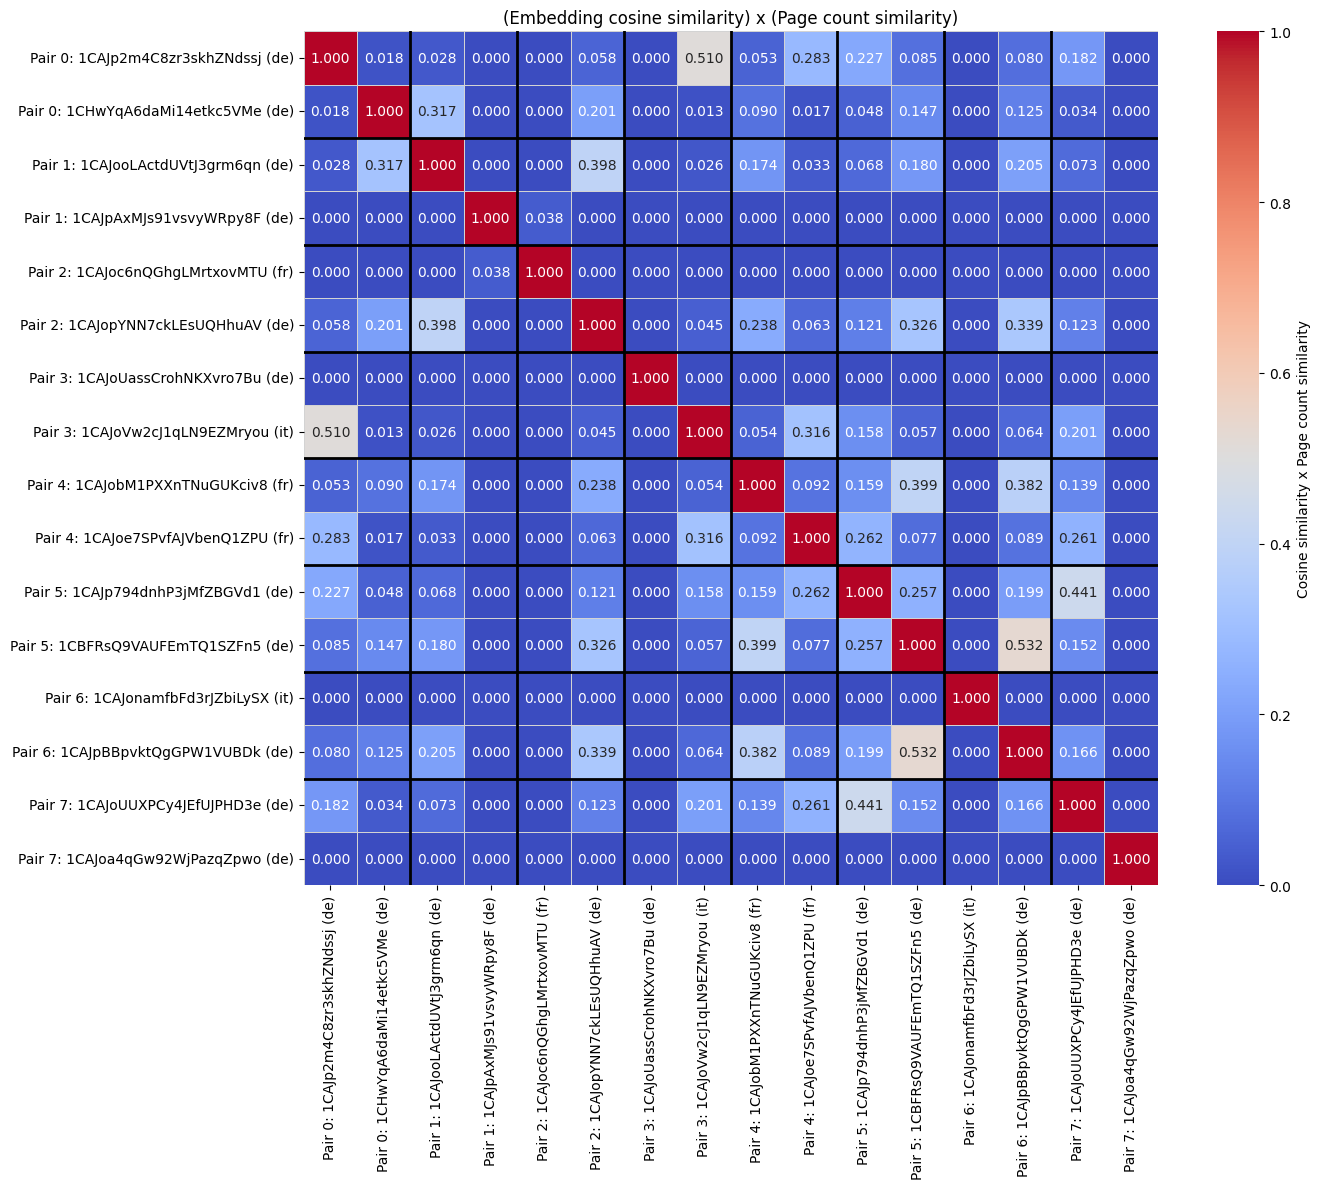

In [14]:
similarity_heatmap(df_negative, df_negative_similarity)